# Lec11: Machine Learning with Scikit-learn


Procedures:

1. Choose a method and import from Scikit-Learn.
2. Choose model hyperparameters (if needed) by instantiating this class with desired values.
3. Arrange data into a features matrix and a target array.
4. Fit the model to data by calling the fit() method of the model instance.
5. Apply the model to new data: <br>
   • For supervised learning, predict labels for unknown data using the predict() method. <br>
   • For unsupervised learning, transform or infer properties of new data using the transform() or predict() method.


### Supervised learning example: classification


In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']


In [2]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [3]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(112, 4)
(38, 4)
(112,)
(38,)


In [4]:
# train_test_split?


In [5]:
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()  # 2. instantiate model
model.fit(Xtrain, ytrain)  # 3. fit model to data
y_model = model.predict(Xtest)  # 4. predict on new data


In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)


0.9736842105263158

### Unsupervised learning example: dimension reduction


In [7]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)  # 3. Fit to data. Notice y is not specified!


PCA(n_components=2)

In [8]:
X_2D = model.transform(X_iris)  # 4. Transform the data to two dimensions


In [9]:
# model.transform?


In [10]:
# sns.lmplot?


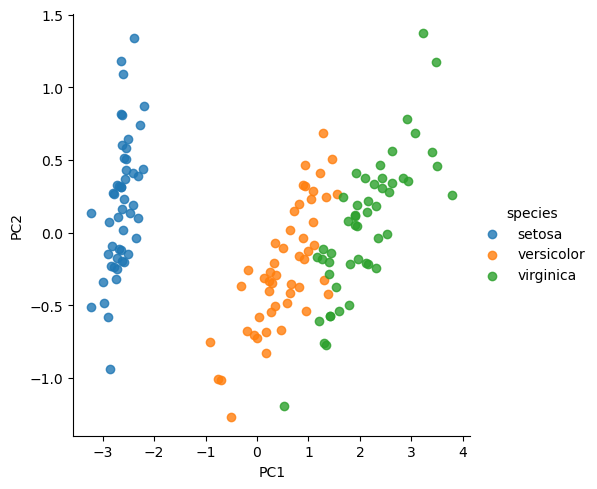

In [11]:
iris['PC1'] = X_2D[:, 0]
iris['PC2'] = X_2D[:, 1]
sns.lmplot(x="PC1", y="PC2", hue='species', data=iris, fit_reg=False)


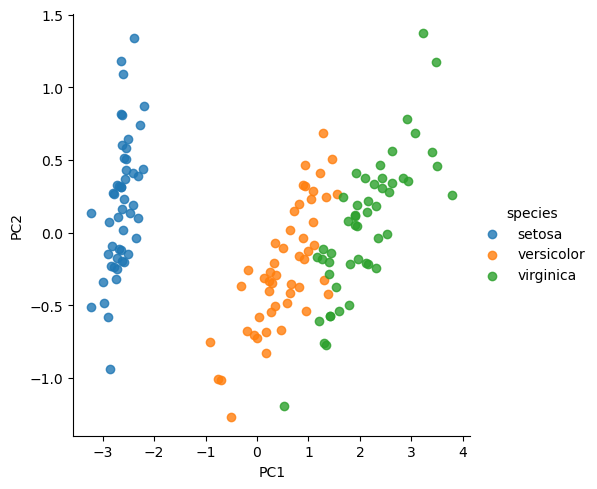

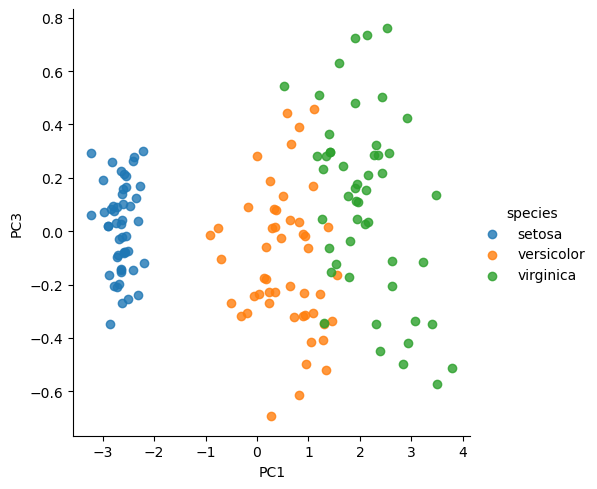

In [12]:
model = PCA(n_components=3)  # try more components
model.fit(X_iris)
X_3D = model.transform(X_iris)
iris['PC1'] = X_3D[:, 0]
iris['PC2'] = X_3D[:, 1]
iris['PC3'] = X_3D[:, 2]
sns.lmplot(x="PC1", y="PC2", hue='species', data=iris, fit_reg=False)
sns.lmplot(x="PC1", y="PC3", hue='species', data=iris, fit_reg=False)


### Unsupervised learning example: clustering


In [13]:
from sklearn.mixture import GaussianMixture  # 1. Choose the model class
model = GaussianMixture(n_components=3)  # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris)  # 3. Fit to data. Notice y is not specified!


GaussianMixture(n_components=3)

In [14]:
# GaussianMixture?


In [15]:
y_gmm = model.predict(X_iris)  # 4. Determine cluster labels


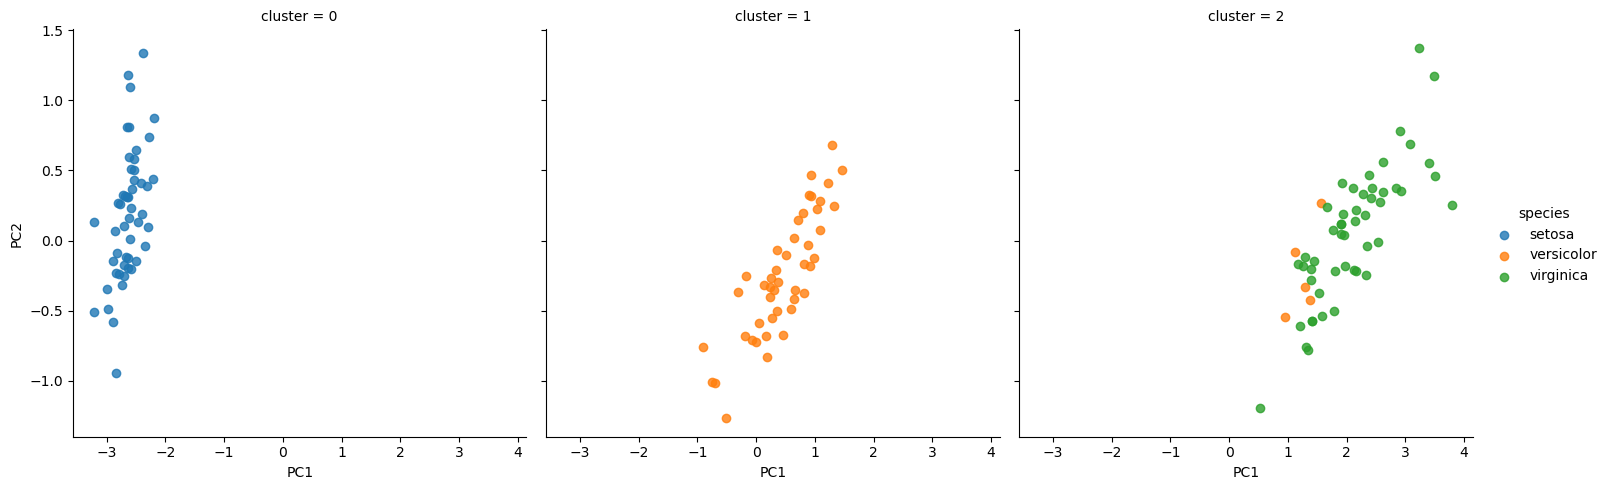

In [16]:
iris['cluster'] = y_gmm
sns.lmplot(x="PC1", y="PC2", data=iris, hue='species',
           col='cluster', fit_reg=False)


### Application: Exploring Handwritten Digits


#### Loading and visualizing the digits data


In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape


(1797, 8, 8)

In [18]:
digits.target.shape


(1797,)

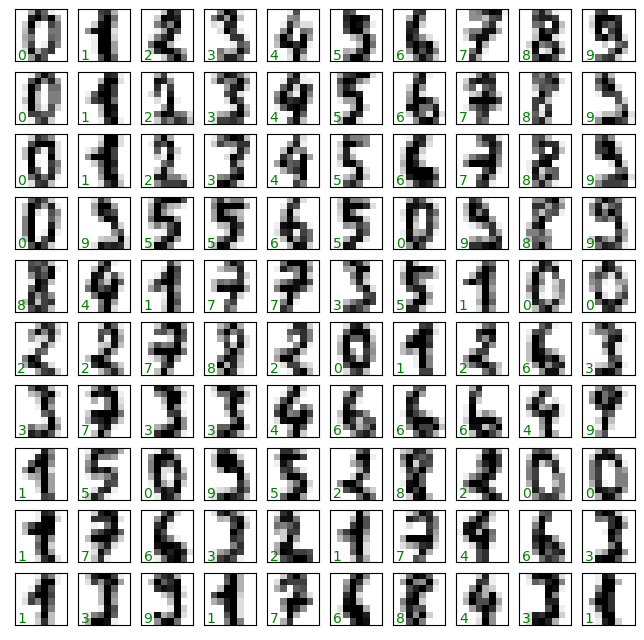

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []}
                         )
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')


In [20]:
X = digits.data
X.shape


(1797, 64)

In [21]:
y = digits.target
y.shape


(1797,)

#### Dimension reduction: manifold learning algorithm


In [22]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape


/home/alex/anaconda3/envs/2001/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/alex/anaconda3/envs/2001/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

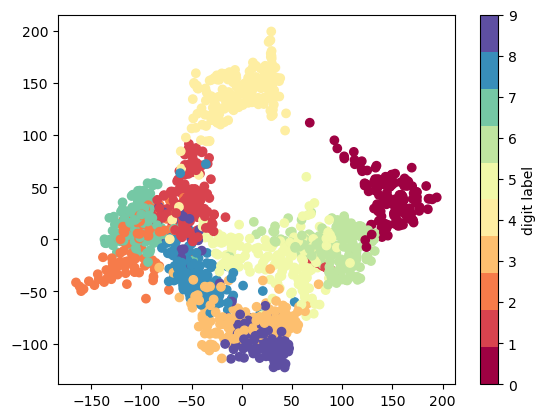

In [23]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))


#### Classification


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

accuracy_score(ytest, y_model)


0.8333333333333334

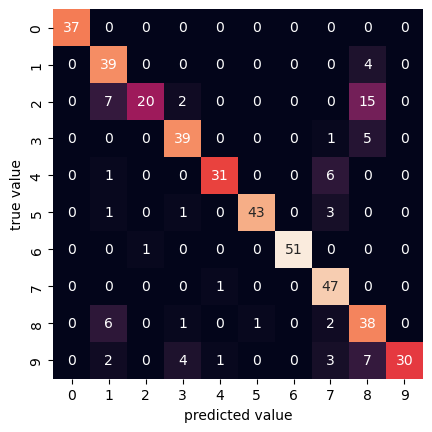

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')


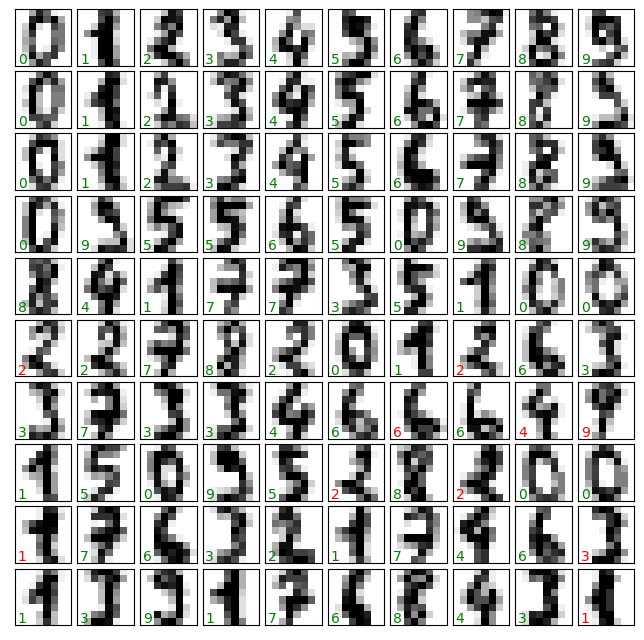

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')


### Model selection example: cross-validation and bias variance trade-off


#### Polynomial regression


In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# **kwargs are mostly used in function definitions
# allow you to pass an unspecified number of arguments to a function
# so when writing the function definition, you do not need to know
# how many arguments will be passed to your function


In [28]:
import numpy as np


def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y


X, y = make_data(40)


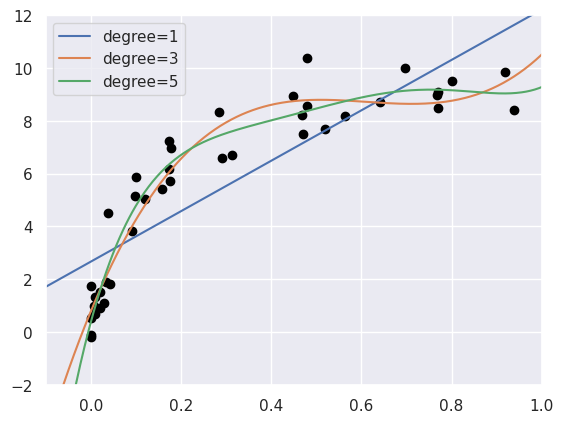

In [29]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
seaborn.set()  # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')


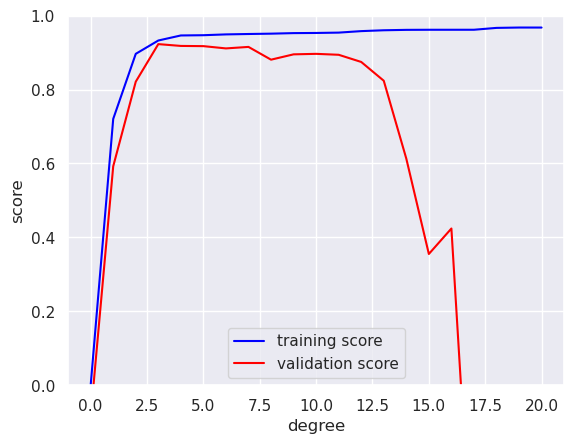

In [30]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')


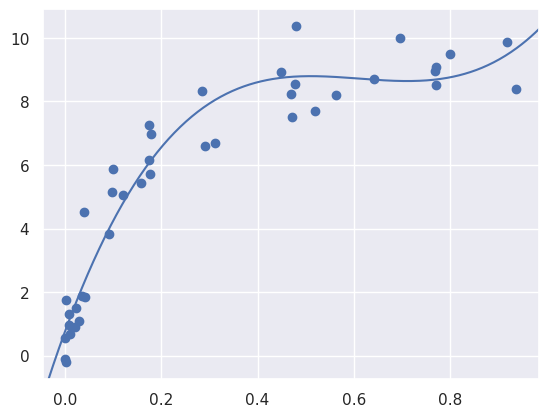

In [31]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)


# In-Depth: Support Vector Machines


Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.
In this section, we will develop the intuition behind support vector machines and their use in classification problems.

We begin with the standard imports:


In [32]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# use seaborn plotting defaults
sns.set()


## Motivating Support Vector Machines


As part of our disussion of Bayesian classification (Naive Bayes), we learned a simple model describing the distribution of each underlying class, and used these generative models to probabilistically determine labels for new points.
That was an example of _generative classification_; here we will consider instead _discriminative classification_: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated:


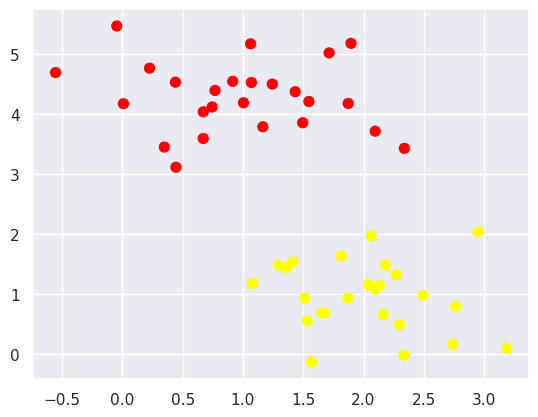

In [33]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification.
For two dimensional data like that shown here, this is a task we could do by hand.
But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:


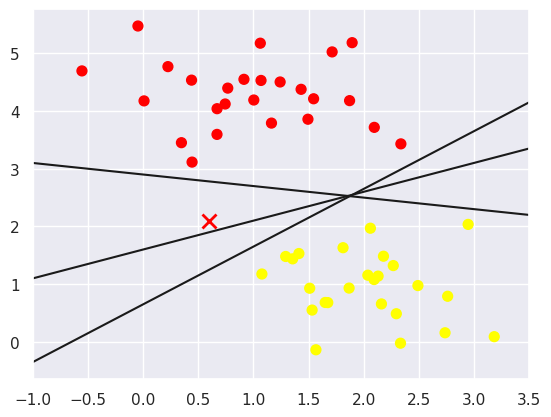

In [34]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)


These are three _very_ different separators which, nevertheless, perfectly discriminate between these samples.
Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!
Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.


## Support Vector Machines: Maximizing the _Margin_

Support vector machines offer one way to improve on this.
The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a _margin_ of some width, up to the nearest point.
Here is an example of how this might look:


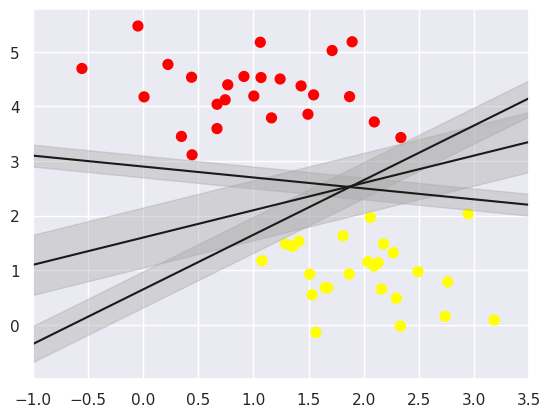

In [35]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)


In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a _maximum margin_ estimator.


### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.
For the time being, we will use a linear kernel and set the `C` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).


In [36]:
from sklearn.svm import SVC  # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:


In [37]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


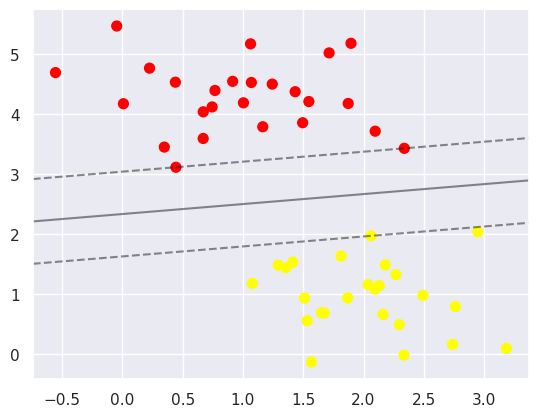

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)


This is the dividing line that maximizes the margin between the two sets of points.
Notice that a few of the training points just touch the margin.
These points are the pivotal elements of this fit, and are known as the _support vectors_, and give the algorithm its name.
In Scikit-Learn, the identity of these points are stored in the `support_vectors_` attribute of the classifier:


In [39]:
model.support_vectors_


array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:


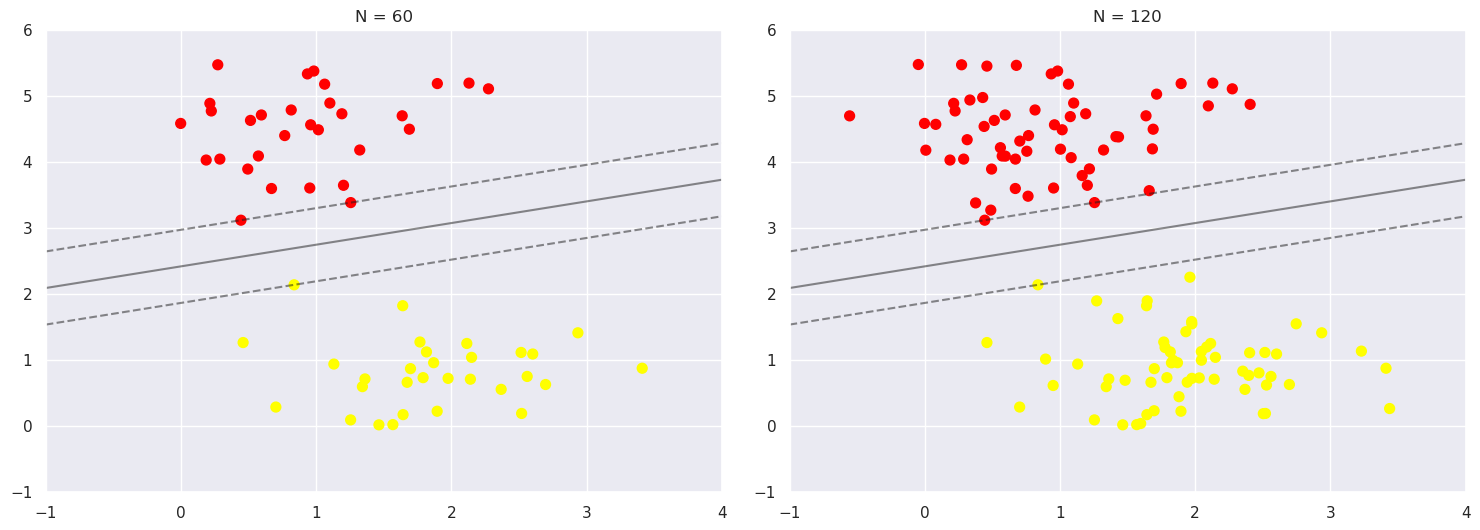

In [40]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


In the left panel, we see the model and the support vectors for 60 training points.
In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel.
This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.


Interactive widgets to view this feature of the SVM model interactively:


In [41]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 20, 30, 40, 50, 200], ax=fixed(None))


interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 200), value=10), Output()), _dom_…

### Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with _kernels_.
We have seen a version of kernels before, in the basis function regressions of Linear Regression.
There we projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.

To motivate the need for kernels, let's look at some data that is not linearly separable:


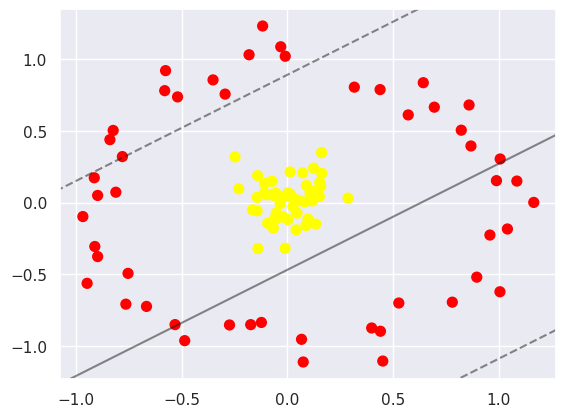

In [42]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)


It is clear that no linear discrimination will _ever_ be able to separate this data.
But we can draw a lesson from the basis function regressions in Linear Regression, and think about how we might project the data into a higher dimension such that a linear separator _would_ be sufficient.
For example, one simple projection we could use would be to compute a _radial basis function_ centered on the middle clump:


In [43]:
r = np.exp(-(X ** 2).sum(1))


We can visualize this extra data dimension using a three-dimensional plot:


In [44]:
from mpl_toolkits import mplot3d


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')


interact(plot_3D, elev=[-90, 0, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y))


interactive(children=(Dropdown(description='elev', options=(-90, 0, 90), value=-90), IntSlider(value=30, descr…

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, _r_=0.7.

Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results.
In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use. See [_kernel trick_](https://en.wikipedia.org/wiki/Kernel_trick). This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the `kernel` model hyperparameter:


In [45]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)


SVC(C=1000000.0)

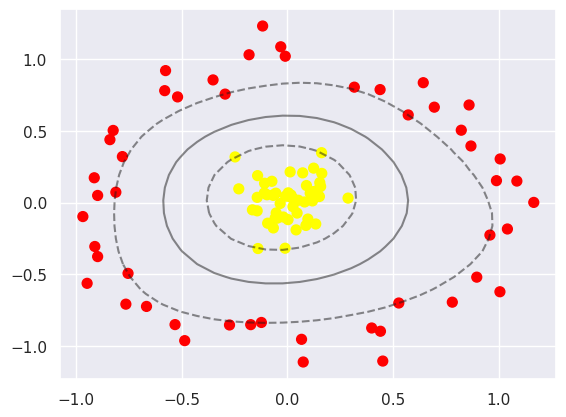

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')


Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.
This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.


### Tuning the SVM: Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.
But what if your data has some amount of overlap?


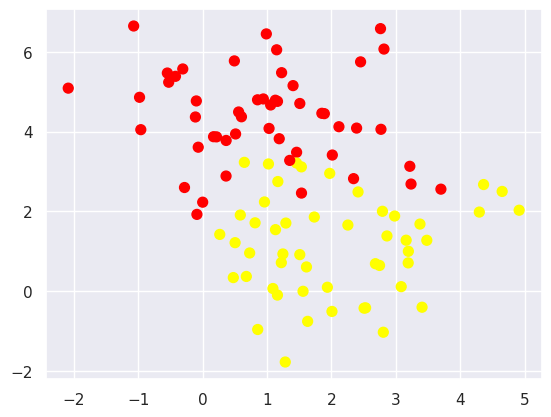

In [47]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit.
The hardness of the margin is controlled by a tuning parameter, most often known as $C$.
For very large $C$, the margin is hard, and points cannot lie in it.
For smaller $C$, the margin is softer, and can grow to encompass some points.


In [48]:
# SVC?


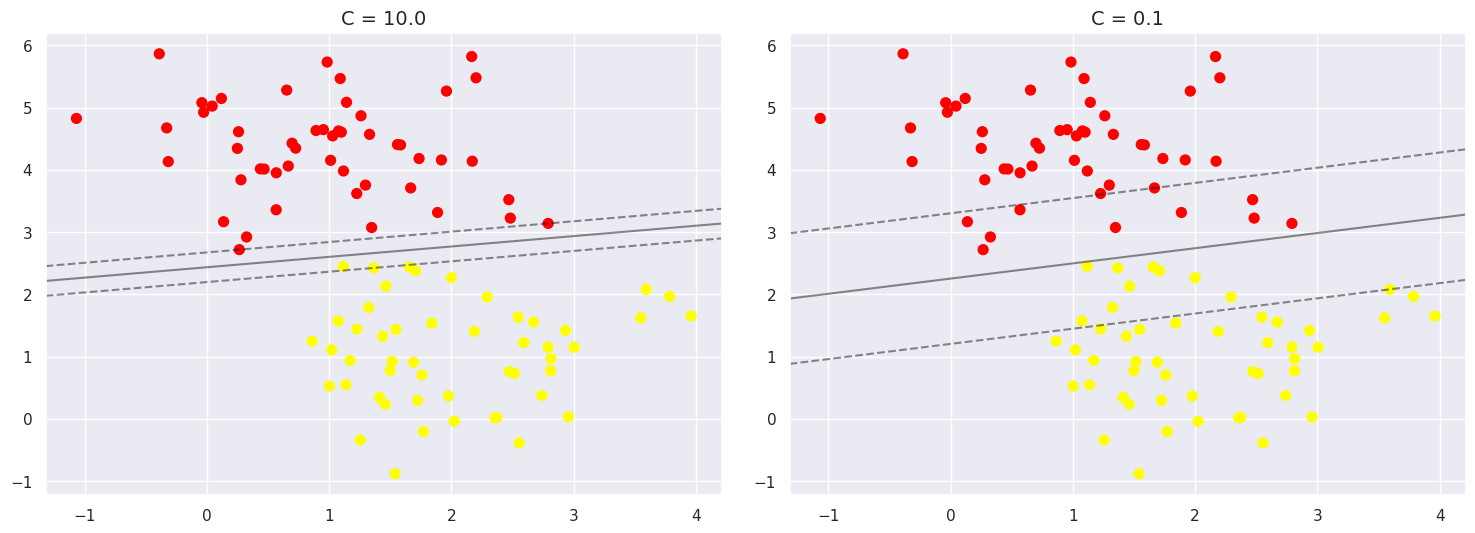

In [49]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)


# In-Depth: Decision Trees and Random Forests


Random forests are an example of an _ensemble_ method, meaning that it relies on aggregating the results of an ensemble of simpler estimators.
The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting!
We will see examples of this in the following sections.
We begin with the standard imports:


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set()


## Motivating Random Forests: Decision Trees


Random forests are an example of an _ensemble learner_ built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects based on binary splitting.


The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.
The trick, of course, comes in deciding which questions to ask at each step.
In machine learning implementations of decision trees, each node in the tree splits the data into two groups using a cutoff value within one of the features.


### Creating a decision tree

Consider the following two-dimensional data, which has one of four class labels:


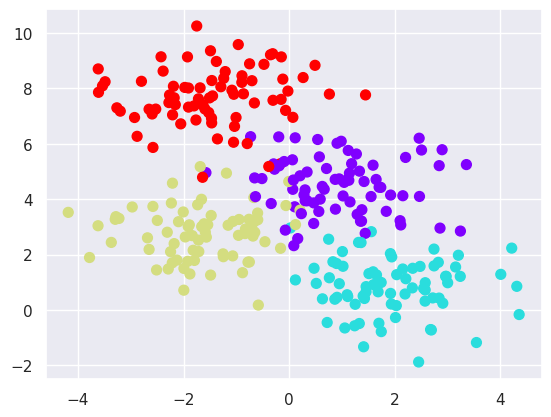

In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')


A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.
Notice that after the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch.
Except for nodes that contain all of one color, at each level _every_ region is again split along one of the two features.


This process of fitting a decision tree to our data can be done in Scikit-Learn with the `DecisionTreeClassifier` estimator:


In [52]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)


Let's write a quick utility function to help us visualize the output of the classifier:


In [53]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)


Now we can examine what the decision tree classification looks like:


/tmp/ipykernel_110107/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


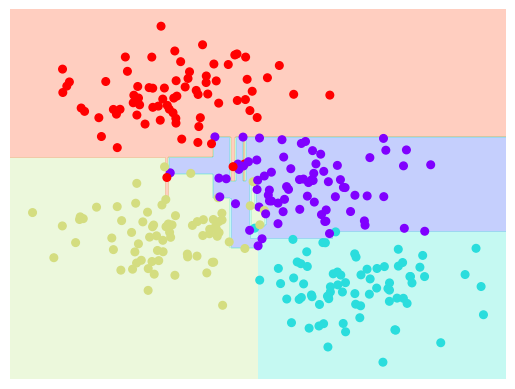

In [54]:
visualize_classifier(DecisionTreeClassifier(), X, y)


Notice that as the depth increases, we tend to get very strangely shaped classification regions; for example, at a depth of five, there is a tall and skinny purple region between the yellow and blue regions.
It's clear that this is less a result of the true, intrinsic data distribution, and more a result of the particular sampling or noise properties of the data.
That is, this decision tree, even at only five levels deep, is clearly over-fitting our data.


### Decision trees and over-fitting

Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.
Another way to see this over-fitting is to look at models trained on different subsets of the data. Inconsistencies tend to happen where the classification is less certain, and thus by using information from many classification trees, we might come up with a better result.


## Ensembles of Estimators: Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting. It makes use of an ensemble of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a _random forest_.

This type of bagging classification can be done manually using Scikit-Learn's `BaggingClassifier` meta-estimator, as shown here:


/tmp/ipykernel_110107/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


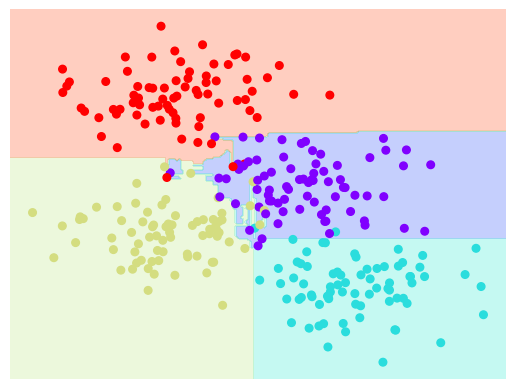

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)


In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points.
In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness.
For example, when determining which feature to split on, the randomized tree might select from among the top several features.
You can read more technical details about these randomization strategies in the [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest) and references within.

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the `RandomForestClassifier` estimator, which takes care of all the randomization automatically.


/tmp/ipykernel_110107/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


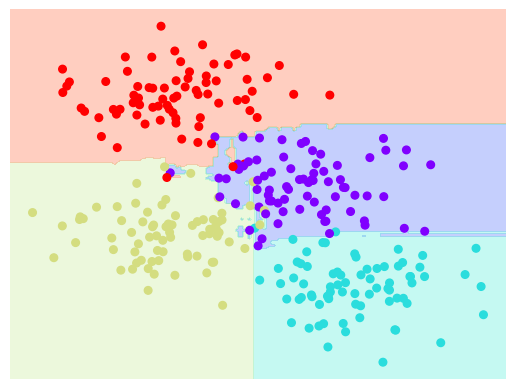

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)


We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.
